## Exploring iSOON's Leaked Chats

### Setup Dependencies

In [15]:
import sys
import os
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib import rcParams
import spacy
import gensim
from gensim.parsing.preprocessing import STOPWORDS as gensim_stopwords


## Wordcloud Visualization

### Read Files

In [10]:

path = os.path.join(os.getcwd(),"isoon_chats_english.txt")
with open(path,"r") as fh:
        file_data = fh.read()
        
file_data

'nullroot\nwei592628\nI am null_whoami\nnullroot\nwei592628\nMr. Wei, where is it probably? \nnullroot\nwei592628\nTwitter has been under investigation for some time and has been under surveillance\nwei592628\nnullroot\nThen I will find an account for you later and check it out for me\nwei592628\nnullroot\nIs it convenient to make voice calls? \nnullroot\nwei592628\n\nwei592628\nnullroot\nHello Mr. Zhou, I have a few numbers that I would like you to help me with\nnullroot\nwei592628\nMr. Wei, please send it to me\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\n\nwei592628\nnullroot\nAll push accounts, the last one is the push account applied with g’s email address\nnullroot\nwei592628\nReceived\nwei592628\nnullroot\nThank you\nwei592628\nnullroot\nAlso, if I want to do something personal,\nHow much funding does the book platform require and how long will it take? Currently, d

### Setup Stopwords and Generate Wordcloud

In [8]:
spacy_stopwords = spacy.load('en_core_web_sm')
sw_spacy = list(spacy_stopwords.Defaults.stop_words)

['mostly', 'mine', 'take', 'very', 'while', 'also', 'however', 'front', 'keep', 'moreover', 'has', '‘d', 'down', 'alone', 'nothing', 'serious', 'its', 'whereas', 'yourself', 'rather', 'along', 'they', 'eleven', 'go', 'with', 'amount', 'nowhere', 'well', 'top', 'wherein', "'s", 'whether', 'often', 'say', 'myself', 'twelve', 'thus', 'n’t', 'already', 'latterly', 'were', "n't", 'must', 'an', 'formerly', 'each', 'now', 'ourselves', 'always', 'was', 'made', 'someone', 'and', 'herein', 're', 'seems', 'us', 'this', 'part', 'namely', 'such', 'besides', 'give', 'only', 'across', 'below', 'same', 'sometimes', 'the', 'anyway', 'how', 'by', 'but', 'through', 'side', 'all', 'nobody', 'thru', 'thereupon', 'used', 'many', 'can', 'back', 'various', 'my', 'without', 'five', 'among', 'except', 'much', 'anything', 'ours', 'anyone', 'meanwhile', 'what', 'seem', 'ca', '’re', 'any', 'else', 'thence', 'whole', 'on', 'three', 'make', 'her', 'am', 'been', 'himself', '‘ve', 'cannot', 'hereupon', 'therefore', 't

In [18]:
#create stop words 
nltk.download("stopwords")


#list of stopwords
stopwords = stopwords.words("english")
stopwords.extend([
    'td',
    'tr',
    'NULL'
])
stopwords.extend(sw_spacy)
stopwords.extend(list(gensim_stopwords))

[nltk_data] Downloading package stopwords to /home/bikram-
[nltk_data]     xps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
MAX_WORDS = 500

In [20]:
#call the wordcloud Constructor 
WC = WordCloud(
    stopwords=stopwords,
    max_words=MAX_WORDS,
    background_color="white", 
    width=1800, 
    height=800, 
    collocations=False).generate(file_data)

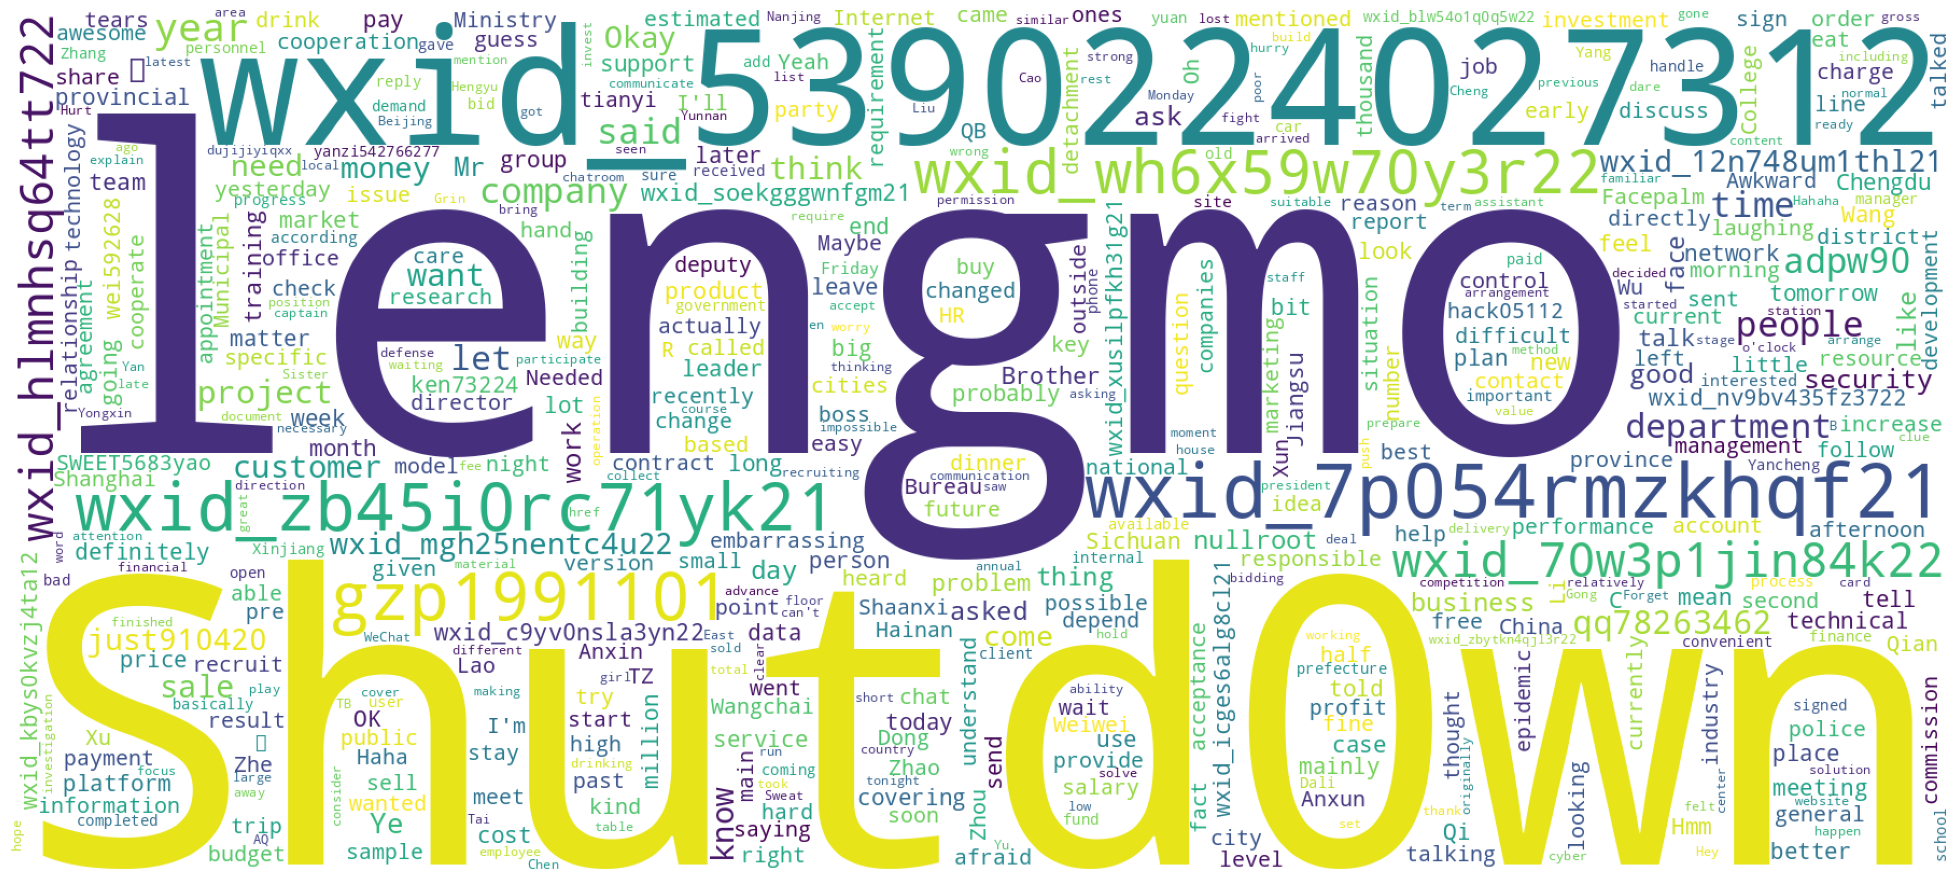

In [21]:
plt.figure(figsize=(25,15), facecolor='white')
plt.imshow(WC)
plt.axis("off")
plt.show()

## Extract Observables

In [84]:
from ioc_finder import find_iocs, parse_domain_names

observables = parse_domain_names(file_data)

In [93]:
observables = [observable for observable in observables if not observable.endswith('-en.md')]

['baike.baidu.com',
 'drdo.gov.in',
 'finance.sina.com.cn',
 'gd9189.com',
 'm.guancha.cn',
 'm.sohu.com',
 'mahagst.gov.in',
 'meeting.tencent.com',
 'mjj-rocrpy.vaiwan.com',
 'pan.baidu.com',
 'qq.com',
 'selectarticlenewsbyid.do',
 'surl.amap.com',
 't.wss.ink',
 'translate.google.com',
 'w66588.com',
 'w81518.com',
 'www.57w66.com',
 'www.cac.gov.cn',
 'www.cyberdefensemagazine.com',
 'www.plap.cn',
 'www.w66369.com',
 'www.w81519.com',
 'www.yutainews.com',
 'zhuanlan.zhihu.com']